**Exploring Drowsiness Patterns in Wearable Device Data**

**Objective**:

Your task is to perform an Exploratory Data Analysis (EDA) on a dataset collected from these smartwatches. The dataset includes various physiological parameters along with a 'drowsiness' label, which indicates the level of sleepiness based on an adapted Karolinska Sleepiness Scale (KSS).




# Dataset Details:


**• Columns:**

heartRate: Heart rate readings from the smartwatch sensors.


ppgGreen, ppgRed, ppgIR: PPG (Photoplethysmography) sensor readings in green, red, and infrared wavelengths respectively.

drowsiness: Label indicating the level of drowsiness based on an adapted Karolinska Sleepiness Scale (KSS). Values range from 0.0 to 2.0, where 0.0 represents alertness and 2.0 represents significant drowsiness.

**Dataset Access:**

• Link: Drowsiness Dataset on Kaggle
• Download Instructions:
1. Visit the provided Kaggle dataset link.
2. Sign in to your Kaggle account (or create one if you don't have it).
3. Click on the "Download" button to download the dataset (drowsiness_dataset.csv).


In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#Load the dataset
data= pd.read_csv("/content/drowsiness_dataset.csv")

In [118]:
data.head(30)


,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
0,54.0,1584091.0,5970731.0,6388383.0,0.0
1,54.0,1584091.0,5971202.0,6392174.0,0.0
2,54.0,1581111.0,5971295.0,6391469.0,0.0
3,54.0,1579343.0,5972599.0,6396137.0,0.0
4,54.0,1579321.0,5971906.0,6392898.0,0.0
5,54.0,1578536.0,5969930.0,6389646.0,0.0
6,54.0,1577547.0,5970184.0,6389553.0,0.0
7,54.0,1576090.0,5971546.0,6385977.0,0.0
8,54.0,1576964.0,5974102.0,6385031.0,0.0
9,54.0,1578325.0,5975938.0,6386914.0,0.0


In [119]:
data.describe()


,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
count,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06
mean,7.814245e+01,2.073589e+06,5.643653e+06,5.728191e+06,8.593592e-01
std,1.296635e+01,4.418773e+05,3.909626e+05,4.313052e+05,8.370285e-01
min,5.000000e+01,5.897580e+05,4.441989e+06,4.409976e+06,0.000000e+00
25%,6.800000e+01,1.780621e+06,5.368700e+06,5.402542e+06,0.000000e+00
50%,7.800000e+01,2.044658e+06,5.646039e+06,5.818748e+06,1.000000e+00
75%,8.700000e+01,2.333117e+06,5.927128e+06,6.016016e+06,2.000000e+00
max,1.190000e+02,3.530798e+06,6.842637e+06,7.061799e+06,2.000000e+00


In [120]:
data['drowsiness'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 4890260 entries, 0 to 4890259
Series name: drowsiness
Non-Null Count    Dtype  
--------------    -----  
4890260 non-null  float64
dtypes: float64(1)
memory usage: 37.3 MB


In [121]:
df = pd.DataFrame(data)
print(df)

         heartRate   ppgGreen     ppgRed      ppgIR  drowsiness
0             54.0  1584091.0  5970731.0  6388383.0         0.0
1             54.0  1584091.0  5971202.0  6392174.0         0.0
2             54.0  1581111.0  5971295.0  6391469.0         0.0
3             54.0  1579343.0  5972599.0  6396137.0         0.0
4             54.0  1579321.0  5971906.0  6392898.0         0.0
...            ...        ...        ...        ...         ...
4890255       63.0  2286384.0  5783226.0  6356797.0         2.0
4890256       63.0  2289887.0  5783786.0  6357004.0         2.0
4890257       63.0  2291928.0  5784221.0  6358348.0         2.0
4890258       63.0  2295386.0  5785012.0  6358565.0         2.0
4890259       63.0  2296992.0  5783386.0  6357466.0         2.0

[4890260 rows x 5 columns]


In [122]:
df = pd.DataFrame(data)

columns = df[['drowsiness']]

print(columns)

         drowsiness
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
...             ...
4890255         2.0
4890256         2.0
4890257         2.0
4890258         2.0
4890259         2.0

[4890260 rows x 1 columns]


In [123]:
#Measures for each columns
#Mean - The average value
#Median - The mid point value
#deviation


#print("Mean: heartRate, ppgGreen, ppgRed, ppgIR, drowsiness ")

df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_avg = df.mean(axis=0, skipna = True)

print(df_avg)
print('\n')
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_median = df.median(axis=0, skipna = True)

print(df_median)
print('\n')
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_std = df.std(axis=0, skipna = True)

print(df_std)



heartRate     7.814245e+01
ppgGreen      2.073589e+06
ppgRed        5.643653e+06
ppgIR         5.728191e+06
drowsiness    8.593592e-01
dtype: float64


heartRate          78.0
ppgGreen      2044657.5
ppgRed        5646039.0
ppgIR         5818748.0
drowsiness          1.0
dtype: float64


heartRate         12.966349
ppgGreen      441877.278776
ppgRed        390962.637695
ppgIR         431305.164851
drowsiness         0.837029
dtype: float64


In [124]:
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_avg = df.mean(axis=1)

print(df_avg)

0          2788651.8
1          2789504.2
2          2788785.8
3          2789626.6
4          2788835.8
             ...    
4890255    2885294.4
4890256    2886148.4
4890257    2886912.4
4890258    2887805.6
4890259    2887581.8
Length: 4890260, dtype: float64


In [125]:
print('mean of the  heartRate :',round(data['heartRate'].mean(),0))
print('mean of the  ppgGreen :',round(data['ppgGreen'].mean(),0))
print('mean of the  ppgRed :',round(data['ppgRed'].mean(),0))
print('mean of the  ppgIR  :',round(data['ppgIR'].mean(),0))
print('mean of the  drowsiness :',round(data['drowsiness'].mean(),0))

mean of the  heartRate : 78.0
mean of the  ppgGreen : 2073589.0
mean of the  ppgRed : 5643653.0
mean of the  ppgIR  : 5728191.0
mean of the  drowsiness : 1.0


<Axes: >

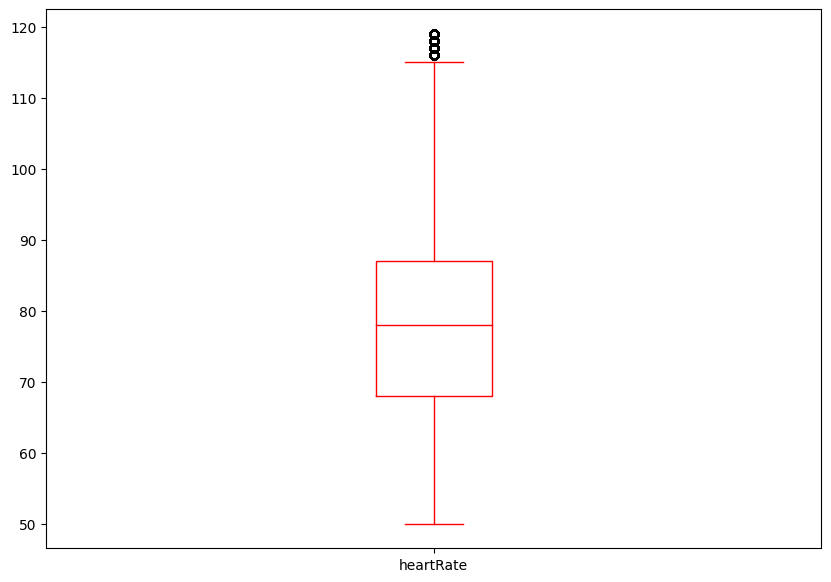

In [126]:
#Box plot
plt.figure(figsize = (10,7))
df.boxplot(column =['heartRate'], grid = False, color = 'red')


KeyboardInterrupt: 

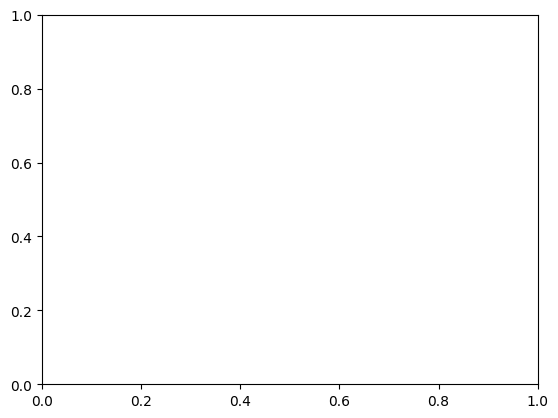

In [127]:
boxplot=df.boxplot(column=['heartRate'],by='ppgGreen',grid=False, rot=20, fontsize=10)
print(boxplot)

In [128]:
#Min and Max of heart rate
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_min = df.min(axis=0, skipna = True)
print(df_min)
print('\n')
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_max = df.max(axis=0, skipna = True)
print(df_max)

heartRate          50.0
ppgGreen       589758.0
ppgRed        4441989.0
ppgIR         4409976.0
drowsiness          0.0
dtype: float64


heartRate         119.0
ppgGreen      3530798.0
ppgRed        6842637.0
ppgIR         7061799.0
drowsiness          2.0
dtype: float64


In [129]:
#Min and Max of columns
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_min = df.min(axis=0, skipna = True)
print(df_min)
print('\n')
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_max = df.max(axis=0, skipna = True)
print(df_max)

heartRate          50.0
ppgGreen       589758.0
ppgRed        4441989.0
ppgIR         4409976.0
drowsiness          0.0
dtype: float64


heartRate         119.0
ppgGreen      3530798.0
ppgRed        6842637.0
ppgIR         7061799.0
drowsiness          2.0
dtype: float64


In [130]:
#Min and Max of columns
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_min = df.min(axis=0, skipna = True)
print(df_min)
print('\n')
df = pd.DataFrame(data, columns=["heartRate", "ppgGreen", "ppgRed", "ppgIR", "drowsiness"])
df_max = df.max(axis=0, skipna = True)
print(df_max)

heartRate          50.0
ppgGreen       589758.0
ppgRed        4441989.0
ppgIR         4409976.0
drowsiness          0.0
dtype: float64


heartRate         119.0
ppgGreen      3530798.0
ppgRed        6842637.0
ppgIR         7061799.0
drowsiness          2.0
dtype: float64


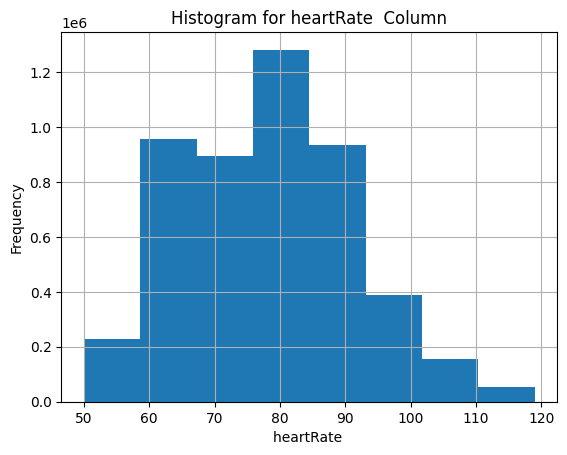

In [131]:
# Plotting Histogram for the 'heartRate' column
hist = df['heartRate'].hist(bins=8)

# Adding title and labels
plt.title('Histogram for heartRate  Column')
plt.xlabel('heartRate ')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

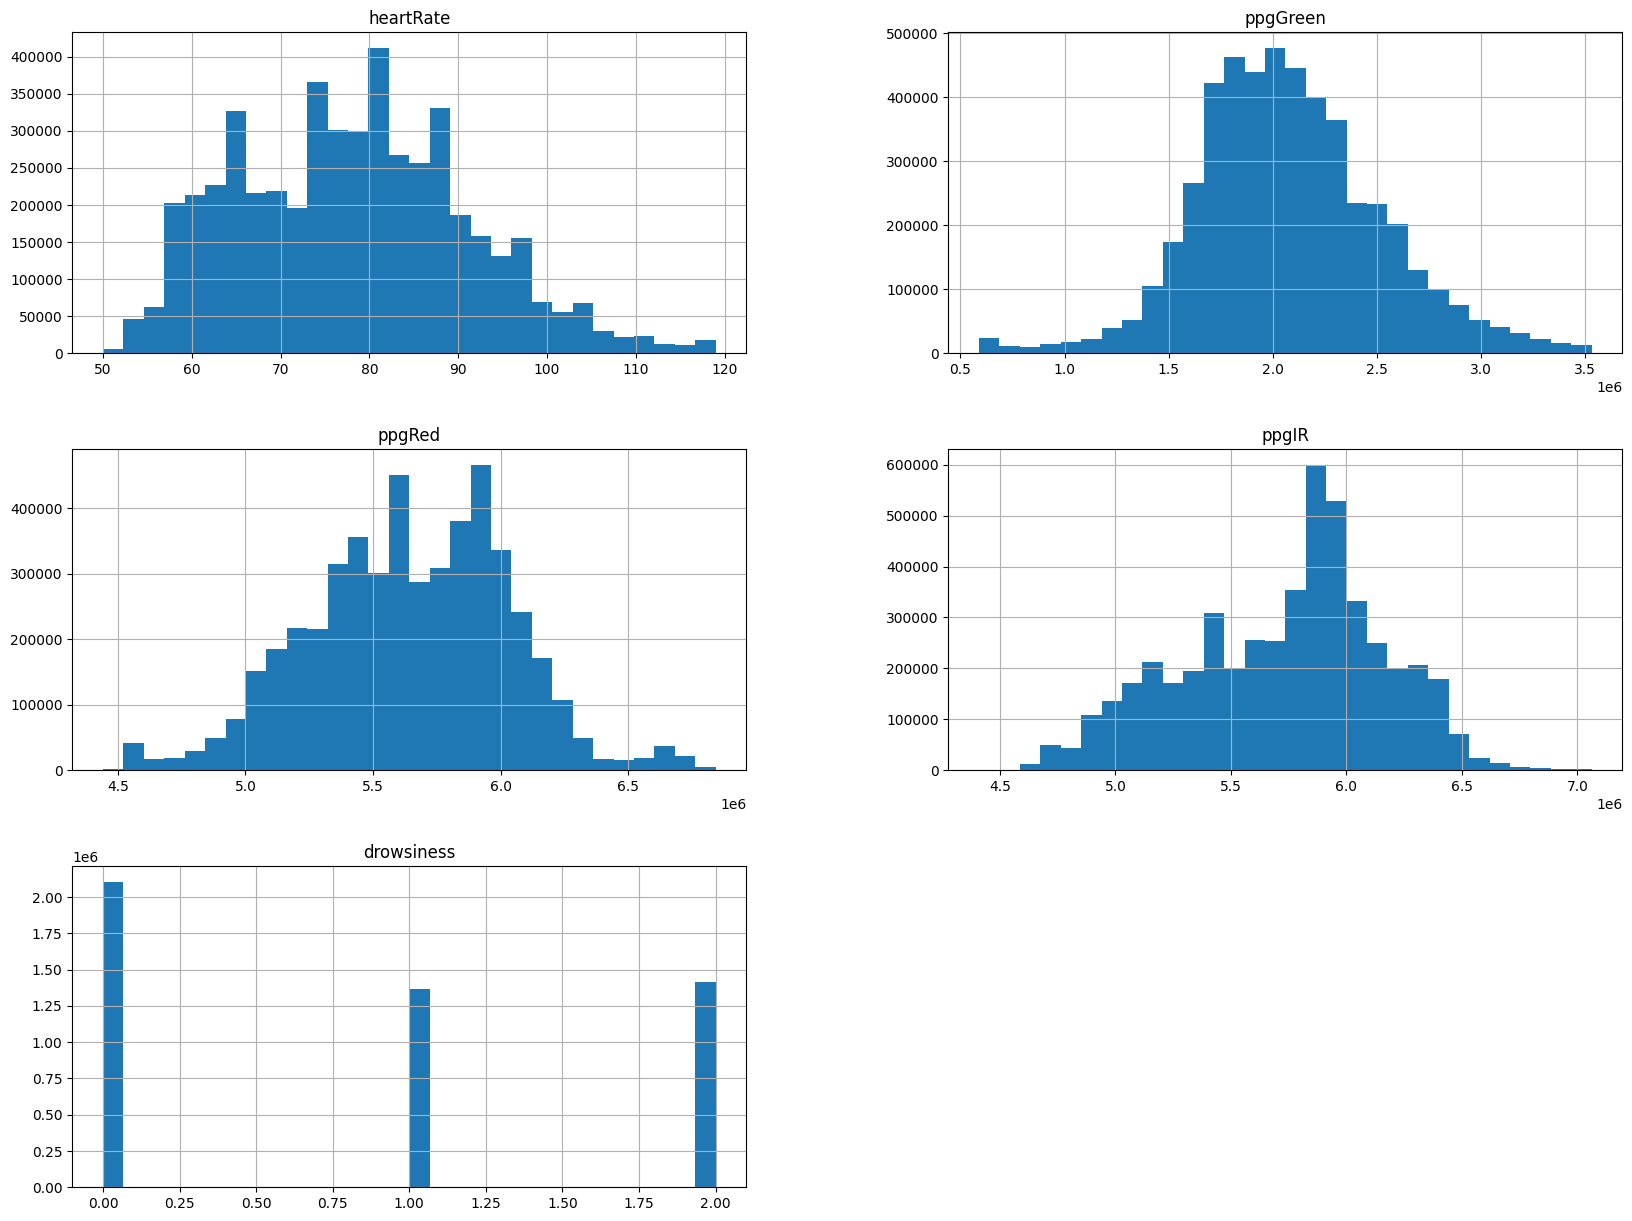

KeyError: ('ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness')

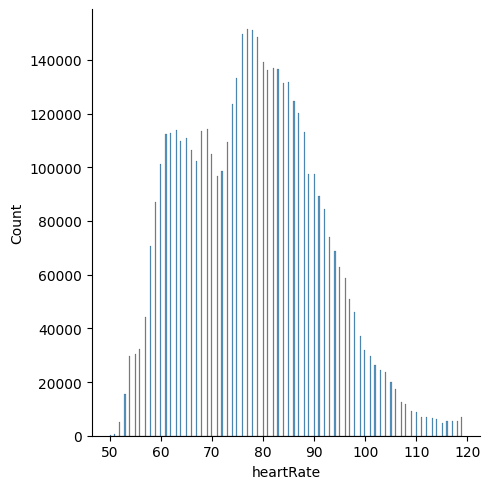

In [132]:
# Plotting histograms
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Plotting distributions
sns.displot(df['heartRate'])
sns.displot(df['ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness'])
plt.show()

In [ ]:
summary_stats = df.describe()
print(summary_stats)

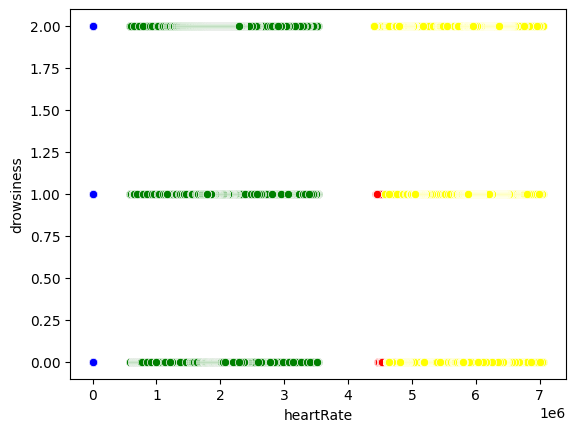

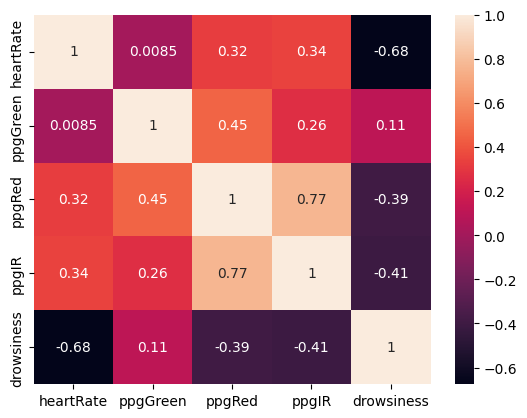

In [133]:
# Scatter plots
sns.scatterplot(x='heartRate', y='drowsiness', data=df, color='blue')
sns.scatterplot(x='ppgGreen', y='drowsiness', data=df, color='green')
sns.scatterplot(x='ppgRed', y='drowsiness', data=df, color='red')
sns.scatterplot(x='ppgIR', y='drowsiness', data=df, color='yellow')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


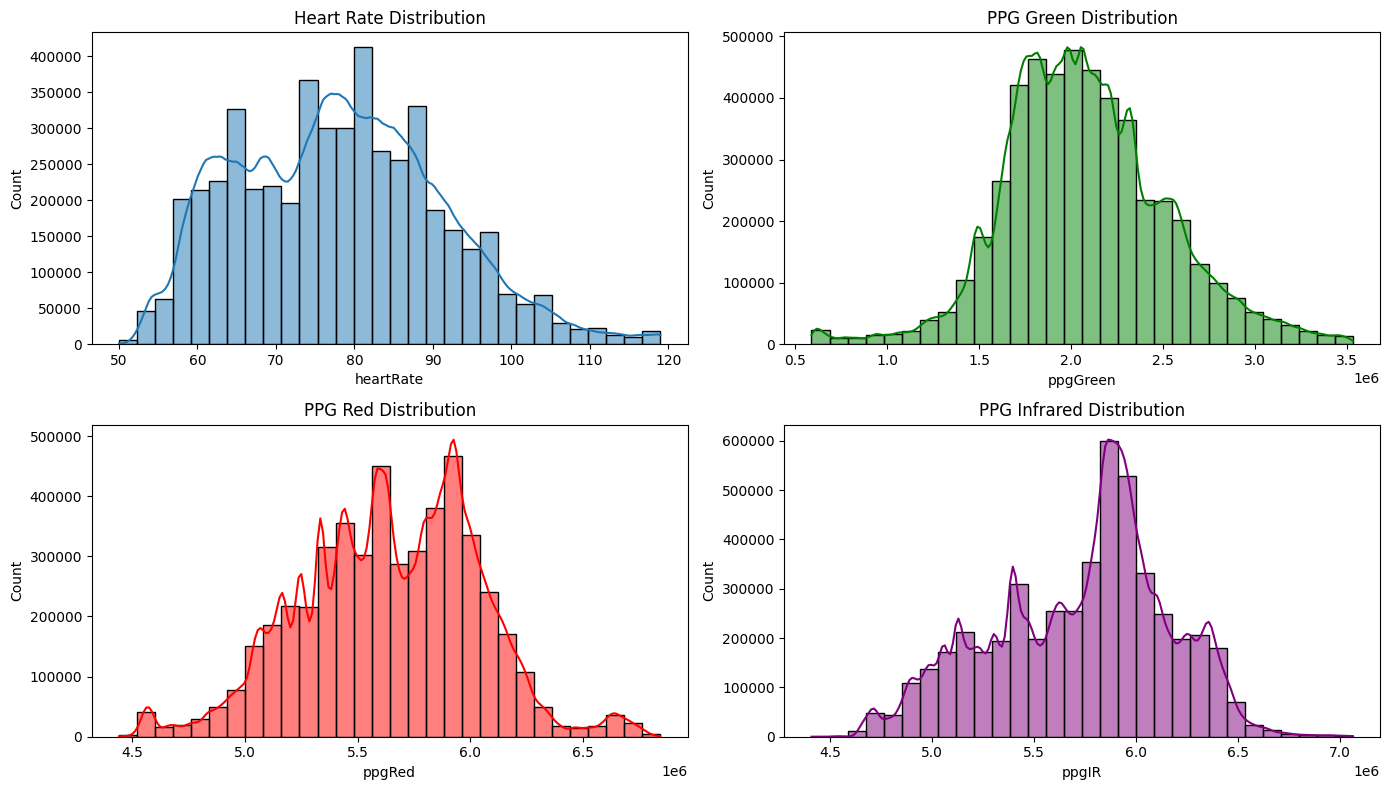

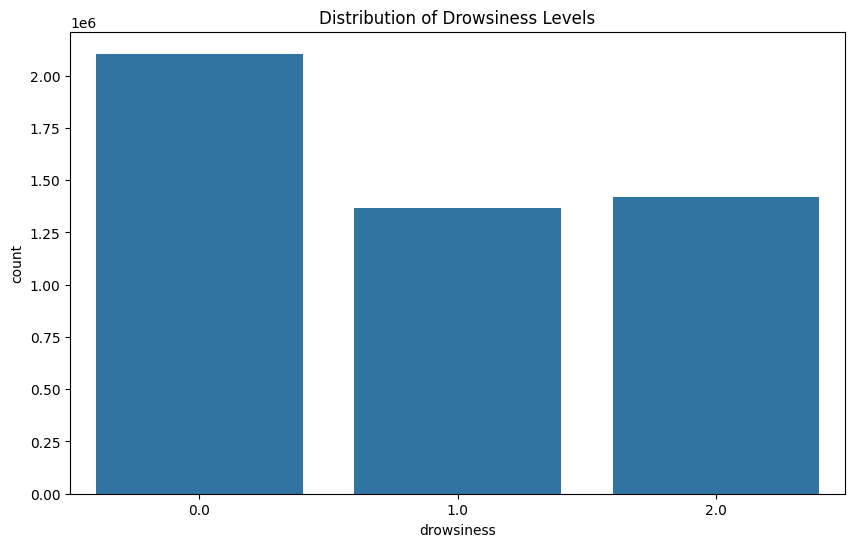

In [134]:

# Plot histograms for heart rate and PPG signals
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['heartRate'], bins=30, kde=True)
plt.title('Heart Rate Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['ppgGreen'], bins=30, kde=True, color='green')
plt.title('PPG Green Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['ppgRed'], bins=30, kde=True, color='red')
plt.title('PPG Red Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['ppgIR'], bins=30, kde=True, color='purple')
plt.title('PPG Infrared Distribution')

plt.tight_layout()
plt.show()

# Plot the distribution of drowsiness levels
plt.figure(figsize=(10, 6))
sns.countplot(x='drowsiness', data=df)
plt.title('Distribution of Drowsiness Levels')
plt.show()


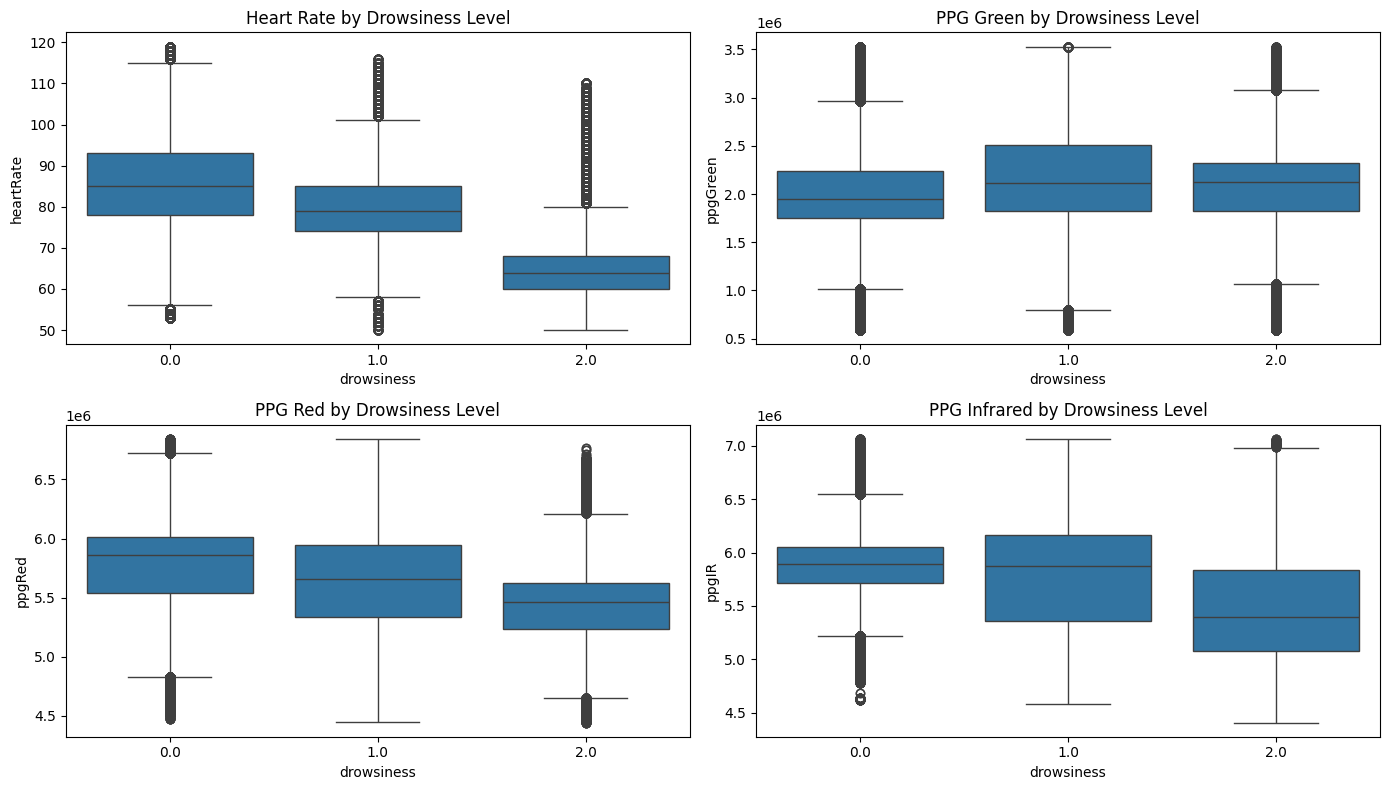

In [135]:
# Boxplot of heart rate and PPG signals by drowsiness
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='drowsiness', y='heartRate', data=df)
plt.title('Heart Rate by Drowsiness Level')

plt.subplot(2, 2, 2)
sns.boxplot(x='drowsiness', y='ppgGreen', data=df)
plt.title('PPG Green by Drowsiness Level')

plt.subplot(2, 2, 3)
sns.boxplot(x='drowsiness', y='ppgRed', data=df)
plt.title('PPG Red by Drowsiness Level')

plt.subplot(2, 2, 4)
sns.boxplot(x='drowsiness', y='ppgIR', data=df)
plt.title('PPG Infrared by Drowsiness Level')

plt.tight_layout()
plt.show()


In [192]:
import sys
sys.setrecursionlimit(100000)  # or any other suitable limit


In [189]:
# Example DataFrame setup
data= pd.DataFrame({'values': range(100)}, index=pd.date_range('2024-01-01', periods=100))

# Define the time periods
time_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
num_periods = len(time_periods)

# Assign each row to a period based on its index position
data['period'] = pd.qcut(data.index, q=num_periods, labels=time_periods)

# Display the distribution of periods
print(data['period'].value_counts())

# Filter the DataFrame by period
period_data = {period: data[data['period'] == period] for period in time_periods}
morning_data = period_data['Morning']
afternoon_data = period_data['Afternoon']
evening_data = period_data['Evening']
night_data = period_data['Night']

period
Morning      25
Afternoon    25
Evening      25
Night        25
Name: count, dtype: int64


In [190]:
def compute_and_visualize_correlations(df, period_label):
# Calculate and plot correlations for each period
   for period in time_periods:
    compute_and_visualize_correlations(period_data[period], period)

In [ ]:
# Apply function to each period's data
compute_and_visualize_correlations(morning_data, 'Morning')
compute_and_visualize_correlations(afternoon_data, 'Afternoon')
compute_and_visualize_correlations(evening_data, 'Evening')
compute_and_visualize_correlations(night_data, 'Night')

In [4]:
df = pd.DataFrame(data)

# Calculating IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_outliers_removed)

         heartRate   ppgGreen     ppgRed      ppgIR  drowsiness
0             54.0  1584091.0  5970731.0  6388383.0         0.0
1             54.0  1584091.0  5971202.0  6392174.0         0.0
2             54.0  1581111.0  5971295.0  6391469.0         0.0
3             54.0  1579343.0  5972599.0  6396137.0         0.0
4             54.0  1579321.0  5971906.0  6392898.0         0.0
...            ...        ...        ...        ...         ...
4890255       63.0  2286384.0  5783226.0  6356797.0         2.0
4890256       63.0  2289887.0  5783786.0  6357004.0         2.0
4890257       63.0  2291928.0  5784221.0  6358348.0         2.0
4890258       63.0  2295386.0  5785012.0  6358565.0         2.0
4890259       63.0  2296992.0  5783386.0  6357466.0         2.0

[4730372 rows x 5 columns]
